In [59]:
import time
from functools import wraps

def timer_decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Execution time for {func.__name__}: {execution_time:.6f} seconds")
        return result
    return wrapper

In [1]:
!wget https://github.com/shrivastava95/odia-dictionary/raw/main/Odia.Dictionary.pdf

--2023-06-10 22:23:52--  https://github.com/shrivastava95/odia-dictionary/raw/main/Odia.Dictionary.pdf
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shrivastava95/odia-dictionary/main/Odia.Dictionary.pdf [following]
--2023-06-10 22:23:53--  https://raw.githubusercontent.com/shrivastava95/odia-dictionary/main/Odia.Dictionary.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4181737 (4.0M) [application/octet-stream]
Saving to: ‘Odia.Dictionary.pdf’

Odia.Dictionary.pdf 100%[===================>]   3.99M  --.-KB/s    in 0.05s   

2023-06-10 22:23:53 (85.6 MB/s) - ‘Odia.Dictionary.pdf’ saved

# Dependencies / Setup
Most of these will need to be setup while you are running the repository code too, so this should help you setup on your own device to run the main repo scripts.

## 1. pdf2image setup

In [ ]:
# poppler - https://pdf2image.readthedocs.io/en/latest/installation.html
# Poppler is the underlying project that does the magic in pdf2image.
!sudo apt-get install poppler-utils
!pdftoppm -h

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 0s (815 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 122542 fi

In [ ]:
# pdf2image
!pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. Tesseract OCR setup

In [ ]:
!sudo add-apt-repository --yes ppa:alex-p/tesseract-ocr-devel

In [ ]:
!sudo apt install -y tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libtesseract5 tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libtesseract5 tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 40 not upgraded.
Need to get 6,234 kB of archives.
After this operation, 20.3 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/alex-p/tesseract-ocr-devel/ubuntu focal/main amd64 libtesseract5 amd64 5.3.1+git6209-9422915e-2ppa1~focal1 [1,241 kB]
Get:2 http://ppa.launchpad.net/alex-p/tesseract-ocr-devel/ubuntu focal/main amd64 tesseract-ocr-eng all 1:5.0.0~git39-6572757-2ppa1~focal1 [1,592 kB]
Get:3 http://ppa.launchpad.net/alex-p/tesseract-ocr-devel/ubuntu focal/main amd64 tesseract-ocr-osd all 1:5.0.0~git39-6572757-2ppa1~focal1 [2,992 kB]
Get:4 http://ppa.launchpad.net/alex-p/tesseract-ocr-devel/ubuntu focal/

In [ ]:
!sudo apt update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/alex-p/tesseract-ocr-devel/ubuntu focal InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
40 packages can be upgraded. Run 'apt list --upgrad

In [ ]:
!tesseract --version

tesseract 5.3.1-3-g9422
 leptonica-1.79.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 2.0.3) : libpng 1.6.37 : libtiff 4.1.0 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.1
 Found AVX2
 Found AVX
 Found FMA
 Found SSE4.1
 Found OpenMP 201511
 Found libarchive 3.4.0 zlib/1.2.11 liblzma/5.2.4 bz2lib/1.0.8 liblz4/1.9.2 libzstd/1.4.4
 Found libcurl/7.68.0 OpenSSL/1.1.1f zlib/1.2.11 brotli/1.0.7 libidn2/2.2.0 libpsl/0.21.0 (+libidn2/2.2.0) libssh/0.9.3/openssl/zlib nghttp2/1.40.0 librtmp/2.3


In [ ]:
!wget https://github.com/tesseract-ocr/tessdata/raw/main/ori.traineddata -O /usr/share/tesseract-ocr/5/tessdata/ori.traineddata
!wget https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata -O /usr/share/tesseract-ocr/5/tessdata/eng.traineddata
!dir /usr/share/tesseract-ocr/5/tessdata

--2023-06-02 08:22:44--  https://github.com/tesseract-ocr/tessdata/raw/main/ori.traineddata
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/ori.traineddata [following]
--2023-06-02 08:22:44--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/ori.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1480096 (1.4M) [application/octet-stream]
Saving to: ‘/usr/share/tesseract-ocr/5/tessdata/ori.traineddata’

/usr/share/tesserac 100%[===================>]   1.41M  --.-KB/s    in 0.05s   

2023-06-02 08:22:45 (25.8 MB/s) - ‘/usr/share/tesseract-ocr/5/tess

In [ ]:
!tesseract --list-langs

List of available languages in "/usr/share/tesseract-ocr/5/tessdata/" (3):
eng
ori
osd


In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 3. PyPDF2 PDF Reader setup

In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.4 MB/s eta 0:00:00


## 4. OpenAI API setup !IMPORTANT!

Get your OpenAI secret key from https://platform.openai.com/account/api-keys and assign it to the `OPENAI_API_KEY` variable 

In [ ]:
OPENAI_API_KEY = "..."

In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 14.2 MB/s eta 0:00:00


# Parsing Odia Dictionary

## 1. Converting PDF pages to images for OCR

In [ ]:
try:
  os.mkdir('pages')
except:
  pass

In [ ]:
import os
from pdf2image import convert_from_path
from tqdm import tqdm

first_page = 7
last_page = 10
pages = convert_from_path('Odia.Dictionary.pdf', 
                          300,  # can reduce to 100 dpi for testing to speed up. requires changing the crop box dimensions in the next section: "## 2. Preprocessing - Cropping images into columns"
                          first_page=first_page,
                          last_page=last_page,
                          ) 
for i, page in enumerate(tqdm(pages)):
    page.save(f'pages/page{first_page+i}.png', 'PNG')

100%|██████████| 4/4 [00:06<00:00,  1.54s/it]


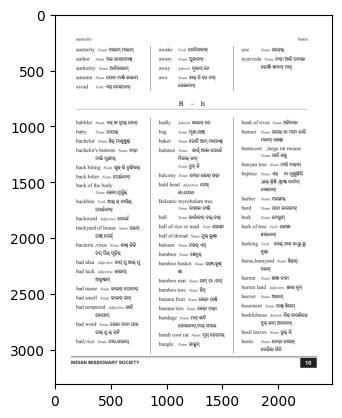

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

plt.imshow(Image.open(f'pages/page10.png'))
plt.show()

## 2. Preprocessing - Cropping images into columns

In [ ]:
try:
  os.mkdir('pages_processed')
except:
  pass

In [ ]:
from PIL import Image
import os
from tqdm import tqdm

for i, img_path in enumerate(tqdm(os.listdir('pages'))):
    if int(img_path.split('.')[0][4:]) in range(6, 88):
        if img_path.split('.')[-1] == 'png':
            img = Image.open(f'pages/{img_path}')
            imgs = [
                img.crop(( 130,  250,  830,  3050)),
                img.crop(( 855,  250, 1569,  3050)),
                img.crop((1592,  250, 2336,  3050)),
            ]
            for i, im in enumerate(imgs):
                path = os.path.join('pages_processed', img_path.split(".")[0] + f"_{i}." + img_path.split(".")[-1])
                # print(path)
                im.save(path)

100%|██████████| 4/4 [00:01<00:00,  2.18it/s]


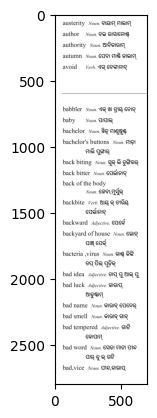

In [ ]:
plt.imshow(Image.open(f'pages_processed/page10_0.png'))

## 3. Generating intermediate PDFs from preprocessed images using Tesseract OCR
**NOTE:** Different PSM modes can be used to affect the way Tesseract parses the document image. \
Refer to this blog post explaining [all OCR options](https://muthu.co/all-tesseract-ocr-options/)

In [ ]:
try:
  os.mkdir('parsed_pdfs')
except:
  pass

In [ ]:
import pytesseract
from tqdm import tqdm
import os


# # remove this line on linux.
# pytesseract.pytesseract.tesseract_cmd = f"C:/Program Files/Tesseract-OCR/tesseract.exe"

# different psm mode can change the behaviour of parsing.
# refer to documentation for further details.
psm_mode = 3
config = f'--psm {psm_mode}'
source_pdf_folder = 'pages_processed'
target_folder = 'parsed_pdfs'
lang='ori+eng'

for i, image_path in enumerate(tqdm(os.listdir(source_pdf_folder))):
    if int(image_path.split('.')[0].split('_')[0][4:]) in range(6, 88):      # only parsing pages 6 - 87, inclusive
        source_image_path = os.path.join(source_pdf_folder, image_path)       # for example: source_pdf_folder/page6_0.png
        target_image_path = os.path.join(target_folder, f'{image_path}.pdf')  # for example: target_folder/page6_0.png.pdf

        with open(target_image_path, 'w+b') as f:
            f.write(pytesseract.image_to_pdf_or_hocr(source_image_path, 
                                                    lang=lang, 
                                                    extension='pdf', 
                                                    config=config))

100%|██████████| 16/16 [01:45<00:00,  6.59s/it]


## 4. Copying OCR outputs from generated PDFs

In [ ]:
try:
  os.mkdir('parsed_texts')
except:
  pass

In [ ]:
# importing required modules
from PyPDF2 import PdfReader
import os
from tqdm import tqdm

  
# creating a pdf reader object

source_folder = f'parsed_pdfs'
target_folder = f'parsed_texts'

for pdf_path in tqdm(os.listdir(source_folder)):
    source_pdf_path = os.path.join(source_folder, pdf_path)
    target_text_path = os.path.join(target_folder, pdf_path + '.txt')

    reader = PdfReader(source_pdf_path)
    page = reader.pages[0]
    text = page.extract_text()
    
    with open(target_text_path, 'w+b') as f:
        f.write(bytes(text, encoding='utf-8'))

100%|██████████| 16/16 [00:03<00:00,  4.46it/s]


In [ ]:
!cat parsed_texts/page10_0.png.pdf.txt

austerity Noun. ବାୟାମ୍‌ ମାଲାମ୍‌ 
author Noun. ବଇ ରାସାନୋଣ୍ଡ 
authority Noun. ଆଦିକାରାମ୍‌ 
autumn Noun. ପେଦା ମାଣି କାଲାମ୍‌ 
avoid ୮୮୮. ଏଗ୍‌ ଦେଙ୍କାନାଦ୍‌ 
babbler Noun. ଏକ୍‌ ଓ ତ୍ରୀୟ୍‌ ନୋନ୍‌ 
୨୫୬୨  Noun. ପାପାଲ୍‌ 
bachelor ?/୨///. €@ ମାଣୁଷୁଣ୍ଠ 
bachelor's buttons Noun. ମାଡ଼ା 
ମାଲି ପୁଙ୍ଗାର୍‌ 
back biting Noun. ସୁକ୍‌ ଲି ତୁଙ୍ଗିଭର୍‌ 
back bitter Noun. ପେର୍ଲାନାଦ୍‌ 
back of the body 
Noun. ଜେବା,ମୁର୍ସୁଲ୍‌ 
backbite ` ‰/ ଆୟ୍‌ କ୍‌ ତୀରିୟ୍‌ 
ପେର୍ଲାନାଦ୍‌ 
backward Adjective. ପେର୍କେ 
backyard of house Noun. ଲୋନ୍‌ 
ପାଞ୍ଚ୍‌ 69K 
bacteria ,virus Noun. କାଣ୍ଡ @& 
ତପ୍‌ ପିଲ୍‌ ପୂଡ଼ିକ୍‌ 
bad idea Adjective. Q19 ପୁ ଆଲ୍‌ ପୁ 
bad luck Adjective. କାରାପ୍‌ 
ଆଡୁଷ୍ଟାମ୍‌ 
bad name Noun. କାରାବ୍‌ ପେଦେର୍‌ 
bad smell Noun. କାରାବ୍‌ ଗାବ୍‌ 
bad tempered Adjective. QIS 
କୋପାମ୍‌ 
bad word Noun. ସେଡା ମାଟା ପୀନ୍ଦ 
ପାର୍‌ ନ୍ଦୁ ଲ୍‌ ଗଟି 
bad,vice Noun ପୀନ୍ଦ, କାରାପ୍‌

## 5. Restructuring raw OCR outputs using GPT API

In [ ]:
try:
  os.mkdir('GPT_outputs')
except:
  pass

In [ ]:
import openai
import os
from tqdm import tqdm
import html
from time import sleep



source_folder = f'parsed_texts'
output_destination = f'GPT_outputs'

for text_path in tqdm(os.listdir(f'{source_folder}')):
    input_path = os.path.join(source_folder, text_path)
    output_path_check = text_path
    output_path = os.path.join(output_destination, text_path)
    try:
        if output_path_check not in os.listdir(output_destination):
            # text_path = 'page6_0.png.pdf.txt'
            with open(input_path, 'rb') as input_text:
                input_text_decoded = html.unescape(input_text.read().decode('utf8'))
            
            
            openai.api_key = OPENAI_API_KEYS[0]
            OPENAI_API_KEYS = OPENAI_API_KEYS[::-1]
            completion = openai.ChatCompletion.create(
                model = "gpt-3.5-turbo",
                temperature = 0.8,
                max_tokens = 4000,
                messages = [
                    {
                        "role": "system", 
                        "content": "You will help me parse raw noisy OCR output into neat tables. The output should contain the proper Odia characters instead of escape sequences."
                    },
                    {
                        "role": "user", 
                        "content": """The table should have three columns:
1. Word in English
2. Part of speech it belongs to
3. Odiya Translation of the word

Here is the raw data. Format it into the table. For example, here are the first two rows of the table:

a | Adjective&Article   | ଅରୋଟ୍‌
accordingly |	Adverb  |  ଆଦିଙ୍କ୍‌ ଲେକେ"""
                    },
                    {
                        "role": "assistant",
                        "content": "Sure! Please provide me with the raw data, and I'll format it into a three-column table for you."
                    },
                    {
                        "role": "user",
                        "content": input_text_decoded
                    }
                ]
            )

            gpt_text = html.unescape(completion.choices[0].message['content'])
            with open(f'{output_path}', 'w+b') as f:
                f.write(gpt_text.encode())
            # sleep(5)
            # break
    except Exception as e:
        print(f'error occured during creation of {output_path}:')
        print(e)
        continue

  6%|▋         | 1/16 [00:00<00:05,  2.54it/s]

error occured during creation of GPT_outputs/page9_1.png.pdf.txt:
This model's maximum context length is 4097 tokens. However, you requested 5247 tokens (1247 in the messages, 4000 in the completion). Please reduce the length of the messages or completion.


 19%|█▉        | 3/16 [00:00<00:03,  3.94it/s]

error occured during creation of GPT_outputs/page10_1.png.pdf.txt:
This model's maximum context length is 4097 tokens. However, you requested 5200 tokens (1200 in the messages, 4000 in the completion). Please reduce the length of the messages or completion.
error occured during creation of GPT_outputs/page7_2.png.pdf.txt:
This model's maximum context length is 4097 tokens. However, you requested 5354 tokens (1354 in the messages, 4000 in the completion). Please reduce the length of the messages or completion.


 31%|███▏      | 5/16 [00:00<00:01,  6.79it/s]

error occured during creation of GPT_outputs/page7_0.png.pdf.txt:
Rate limit reached for default-gpt-3.5-turbo in organization org-aSd4uWv9lTMeaTHfzjK60HdR on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.
error occured during creation of GPT_outputs/page8_0.png.pdf.txt:
Rate limit reached for default-gpt-3.5-turbo in organization org-aSd4uWv9lTMeaTHfzjK60HdR on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.
error occured during creation of GPT_outputs/page10_2.png.pdf.txt:
Rate limit reached for defaul

 50%|█████     | 8/16 [00:01<00:01,  7.80it/s]

error occured during creation of GPT_outputs/page9_2.png.pdf.txt:
Rate limit reached for default-gpt-3.5-turbo in organization org-aSd4uWv9lTMeaTHfzjK60HdR on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.
error occured during creation of GPT_outputs/page7_1.png.pdf.txt:
Rate limit reached for default-gpt-3.5-turbo in organization org-aSd4uWv9lTMeaTHfzjK60HdR on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.


 69%|██████▉   | 11/16 [00:01<00:00,  9.51it/s]

error occured during creation of GPT_outputs/page9_{i}.png.pdf.txt:
Rate limit reached for default-gpt-3.5-turbo in organization org-aSd4uWv9lTMeaTHfzjK60HdR on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.
error occured during creation of GPT_outputs/page10_{i}.png.pdf.txt:
Rate limit reached for default-gpt-3.5-turbo in organization org-aSd4uWv9lTMeaTHfzjK60HdR on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.
error occured during creation of GPT_outputs/page8_{i}.png.pdf.txt:
Rate limit reached for 

100%|██████████| 16/16 [00:01<00:00,  8.40it/s]

error occured during creation of GPT_outputs/page8_2.png.pdf.txt:
Rate limit reached for default-gpt-3.5-turbo in organization org-aSd4uWv9lTMeaTHfzjK60HdR on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.
error occured during creation of GPT_outputs/page8_1.png.pdf.txt:
Rate limit reached for default-gpt-3.5-turbo in organization org-aSd4uWv9lTMeaTHfzjK60HdR on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.
error occured during creation of GPT_outputs/page9_0.png.pdf.txt:
Rate limit reached for default

## 6. Removing unwanted text at the top of GPT outputs
Every GPT output has unwanted text right before the tabulated data that goes something like `"Sure! Here is the formatted three-column table based on the provided raw data:"`. This section removes that part by deleting the lines at the top of the GPT output text files that do not start with the table delimiter `"|"`.

In [ ]:
!rm -rf GPT_outputs/.ipynb_checkpoints/

In [ ]:
import os
import html

source_dir = f'GPT_outputs'

for filepath in os.listdir(source_dir):
    filepath = os.path.join(source_dir, filepath)

    # edit each GPT output text file to remove the unnecessary text before the table begins.
    with open(filepath, 'r+b') as f:
        first = '|'
        file_string = f.read().decode('utf8')
        first_index = file_string.index(first)
        print(filepath)
        print(file_string[:])
        f.seek(0)
        f.write(file_string[first_index:].encode())
        f.truncate()
        # break

GPT_outputs/page9_1.png.pdf.txt
Here is the formatted table:

| Word in English | Part of speech | Odiya Translation |
| --- | --- | --- |
| Oṭān gonṭām | Noun | ହେମା ମାଟି |
| as | Coordinating connective | ବେନ୍‌ ଲେକାନ୍‌ |
| a result | Noun | ଆାତ୍‌ @19,81Q କେ |
| if | Subordinating connective | ବେଲେ ଆଲେ |
| soon as | Correlative connective | କେ ଆଶ୍‌ କେ |
| well | Subordinating connective | ମେଣ୍ଡେ ବା as...as Correlative connective | ଆଲେକେ |
| ascent | Verb | ତାର୍‌ ରାନାଦ୍‌ |
| ash | Noun | ବୁଡ୍‌ @ |
| ashamed | Adjective | ବାର୍ତୋନାଦ୍‌ |
| ashes | Noun | ଆକାର୍‌ ମାଡ୍ଜି ଆତ୍‌ |
| aside | Adverb | ଅଣ୍ଡୋୟ୍‌ ପାକ୍‌ କା |
| ask | Verb | କେସ୍‌ ଉଡ଼ାନାଦ୍‌ |
| ask about a person | Verb | QIS ତୁଙ୍ଗା |
| ask for | Verb | ମାନ୍ଦ୍‌ ଲିସାନାଦ୍‌ |
| ass | Noun | ଗାଡ଼୍‌ ଦେ |
| assemble | Verb | ଗୁଡାନାଦ୍‌ |
| association | Noun | ସର୍ରାତୋର୍କିଙ୍କ୍‌ ସାୟାମ୍‌ ଉଡ଼ାନ୍‌ ସାଙ୍ଗାମ୍‌ |
| asthma | Noun | ନେସ୍‌ କାନାଦ୍‌ କାଷ୍ଟାମ୍‌ ଆଦାନାଦ୍‌ |
| astonishing | Adjective | @IRIA ପୋୟ୍‌ ଭୋଣ୍ଟ |
| astringent | Noun | ଅଗର୍‌ |
| astrono

## 7. Combining the GPT outputs into the final parsed csv


In [ ]:
try:
  os.mkdir('parsed_dicts')
except:
  pass


import pandas as pd
import numpy as np
import os

dataframes = []
source_dir = f'GPT_outputs'

for df_link in os.listdir(source_dir):
    try:

        df_full_source = f'{source_dir}/{df_link}'
        print(df_link)
        df = pd.read_csv(f'{df_full_source}', sep='|', on_bad_lines='skip')
        if df.shape[1] != 5:
            continue
        df = df.iloc[:, 1:-1]
        df.columns = ['English Word', 'Part of Speech', 'Odia Translation']

        dataframes.append(df)
        print(df.shape)
    except Exception as e:
        print(e)
        
    

data = pd.concat(dataframes, axis=0).reset_index(drop=True)
print(data.shape)
rows_to_remove = data[(data[data.columns[0]].str.contains('-')) & (data[data.columns[1]].str.contains('-')) & (data[data.columns[2]].str.contains('-'))].index
data = data.drop(rows_to_remove)

data.to_csv('parsed_dicts/parsed_dict_very_unclean.csv', index=None)

page9_1.png.pdf.txt
(22, 3)
page8_{i}.png.pdf.txt
(25, 3)
page8_0.png.pdf.txt
(31, 3)
page7_{i}.png.pdf.txt
(25, 3)
page9_2.png.pdf.txt
(25, 3)
page7_2.png.pdf.txt
(22, 3)
page10_2.png.pdf.txt
(27, 3)
page10_1.png.pdf.txt
(26, 3)
page10_{i}.png.pdf.txt
(27, 3)
page7_0.png.pdf.txt
(24, 3)
page8_1.png.pdf.txt
(25, 3)
page9_{i}.png.pdf.txt
(29, 3)
page9_0.png.pdf.txt
(30, 3)
page10_0.png.pdf.txt
(23, 3)
page7_1.png.pdf.txt
(19, 3)
page8_2.png.pdf.txt
(25, 3)
(405, 3)


In [ ]:
data.tail()

English Word Part of Speech Odia Translation
400   anus bowel           Noun      ପାର୍ଶ୍ୱ ଗୁଦ 
401      anxiety           Noun             ସଂକଟ 
402      any how         Adverb     ଯେଥାଏ ଯେଉଁଠି 
403       anyone        Pronoun            କୌଣସି 
404       anyway         Adverb      ଯେତେବେଳେଇତେ

# Using DuckDB to search the Database

In [ ]:
!pip install duckdb

In [ ]:
!wget https://raw.githubusercontent.com/shrivastava95/odia-dictionary/main/parsed_dicts/parsed_dict_very_unclean.csv -O sample_db.csv

In [58]:
import duckdb

@timer_decorator
def query_csv_file(csv_file):
    connection = duckdb.connect(':memory:')
    cursor = connection.cursor()

    # Create the table schema based on the CSV file
    create_table_query = f"CREATE TABLE sample_in_memory_table AS SELECT * FROM read_csv_auto('{csv_file}');"
    cursor.execute(create_table_query)

    # Query the in-memory table
    query = f"SELECT * FROM sample_in_memory_table WHERE column2 = ' ଚିନା ପିଲା ';"
    result = cursor.execute(query).fetchall()
    # for row in result:
    #     print(row)

    connection.close()
    return result

# Example usage:
csv_file = "sample_db.csv"
result = query_csv_file(csv_file)
print(result)

Execution time for query_csv_file: 0.017114 seconds
[(' child ', ' Noun ', ' ଚିନା ପିଲା ')]
